In [2]:
import os
import pandas as pd
import glob

from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

%config InlineBackend.figure_formatrmat = 'retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data_dir = "../data/Air_Models/"

scenario_index = pd.DataFrame({"filepath": glob.glob(os.path.join(data_dir, "IG_*_*.csv"))})
scenario_index

,filepath
0,../data/Air_Models/IG_500_390.csv
1,../data/Air_Models/IG_520_300.csv
2,../data/Air_Models/IG_530_300.csv
3,../data/Air_Models/IG_600_560.csv
4,../data/Air_Models/IG_600_400.csv
...,...
135,../data/Air_Models/IG_370_300.csv
136,../data/Air_Models/IG_600_550.csv
137,../data/Air_Models/IG_600_430.csv
138,../data/Air_Models/IG_550_340.csv


In [4]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=5)

train_index, test_index  = next(cv.split(scenario_index.index))
 
print("TRAIN:", train_index, "TEST:", test_index)
print("TRAIN count:", len(train_index), "TEST count:", len(test_index))

TRAIN: [  0   1   2   3   4   5   6   7   8   9  11  13  14  15  16  17  18  19
  20  22  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  41
  42  44  45  47  49  51  55  56  57  58  59  61  62  63  64  65  67  68
  69  71  72  73  76  77  78  79  80  81  82  83  84  85  86  87  88  91
  92  93  95  96  97  99 100 101 103 104 105 106 110 112 113 114 115 116
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139] TEST: [ 10  12  21  23  25  40  43  46  48  50  52  53  54  60  66  70  74  75
  89  90  94  98 102 107 108 109 111 117]
TRAIN count: 112 TEST count: 28


In [5]:
def load_data(scenario_index, selected_index):
    """ Load data from files in scenario_index with indices matching ones in selected_index"""
    
    df_arr = []
    for f in scenario_index.loc[selected_index].filepath:
        Tw = float(f.split("/")[-1].split("_")[1])
        Ti = float(f.split("/")[-1].split("_")[2].replace(".csv", ""))

        f_df = pd.read_csv(f, skiprows=12)
        f_df["Tw"] = Tw
        f_df["Ti"] = Ti
        df_arr.append(f_df)
    
    combined_df = pd.concat(df_arr)
    return combined_df

train_df = load_data(scenario_index, train_index)
train_df

,Time,Tc,Tf,Pc,Ra_d,Nu_d,h,dT/dt,rho,beta,k,cp,visc,Pr,cp.1,Tw,Ti
0,0.00,390.000,445.000,1300000.000,518600.0,12.100,31.83,40.0100,10.154148,0.002247,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
1,0.01,390.400,445.200,1301333.636,517100.0,12.090,31.80,39.8300,10.159997,0.002246,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
2,0.02,390.798,445.399,1302661.343,515600.0,12.080,31.78,39.6500,10.165816,0.002245,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
3,0.03,391.195,445.597,1303983.152,514000.0,12.070,31.75,39.4800,10.171603,0.002244,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
4,0.04,391.590,445.795,1305299.092,512500.0,12.060,31.72,39.3000,10.177359,0.002243,0.0263,1007,0.000018,0.706814,1007,500.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,21.11,498.598,499.299,1661994.056,7647.0,4.103,10.79,0.1729,11.569879,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0
2112,21.12,498.600,499.300,1661999.818,7638.0,4.102,10.79,0.1726,11.569899,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0
2113,21.13,498.602,499.301,1662005.571,7628.0,4.100,10.78,0.1723,11.569919,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0
2114,21.14,498.603,499.302,1662011.316,7619.0,4.099,10.78,0.1721,11.569939,0.002003,0.0263,1007,0.000018,0.706814,1007,500.0,410.0


In [6]:
X = train_df[["Time", "Tw", "Ti"]].to_numpy()
X.shape

(236992, 3)

In [7]:
y = train_df[["Tc"]].to_numpy().reshape(-1,)
print(y.shape)
y

(236992,)


array([390.   , 390.4  , 390.798, ..., 498.602, 498.603, 498.605])

In [8]:
test_df = load_data(scenario_index, test_index)
X_test = test_df[["Time", "Tw", "Ti"]].to_numpy()
y_test = test_df[["Tc"]].to_numpy().reshape(-1,)
print(X_test.shape, y_test.shape)

(59248, 3) (59248,)


In [9]:
model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=30, verbose=1)
model.fit(X, y)

yhat = model.predict(X_test)
print('Predictions:', yhat)
print('Expected values:', y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.8s


Predictions: [362.905616 363.290166 364.090432 ... 548.91078  548.911726 548.912952]
Expected values: [370.    370.928 371.852 ... 549.423 549.423 549.424]


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    5.4s finished


In [10]:
test_df["Tc_hat"] = yhat
test_df

,Time,Tc,Tf,Pc,Ra_d,Nu_d,h,dT/dt,rho,beta,k,cp,visc,Pr,cp.1,Tw,Ti,Tc_hat
0,0.00,370.000,485.000,1233333.333,753900.0,13.420,35.310,92.80000,8.838913,0.002062,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,362.905616
1,0.01,370.928,485.464,1236426.650,752400.0,13.420,35.290,92.38000,8.852613,0.002060,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,363.290166
2,0.02,371.852,485.926,1239505.853,751000.0,13.410,35.270,91.95000,8.866224,0.002058,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,364.090432
3,0.03,372.771,486.386,1242570.998,749500.0,13.400,35.250,91.53000,8.879747,0.002056,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,364.901306
4,0.04,373.687,486.843,1245622.143,748100.0,13.400,35.230,91.12000,8.893183,0.002054,0.0263,1007,0.000018,0.706814,1007,600.0,370.0,365.857462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,21.11,549.421,549.711,1831404.559,2872.0,3.279,8.624,0.05703,11.580045,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,548.908734
2112,21.12,549.422,549.711,1831406.460,2869.0,3.279,8.622,0.05696,11.580051,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,548.910154
2113,21.13,549.423,549.711,1831408.359,2866.0,3.278,8.621,0.05689,11.580057,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,548.910780
2114,21.14,549.423,549.712,1831410.255,2864.0,3.277,8.619,0.05682,11.580063,0.001819,0.0263,1007,0.000018,0.706814,1007,550.0,540.0,548.911726


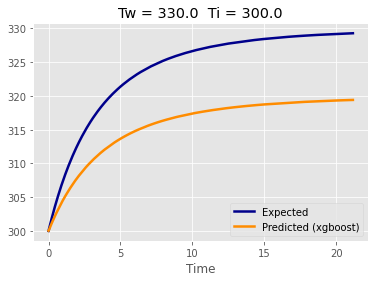

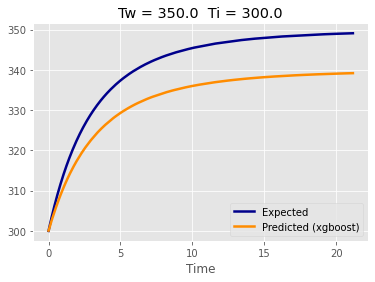

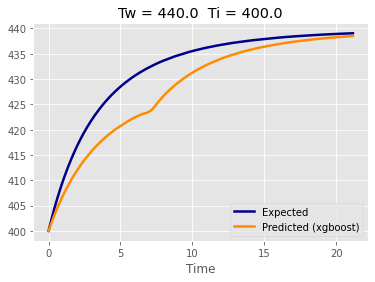

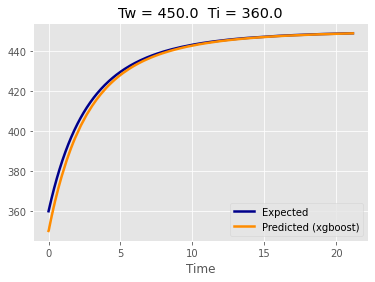

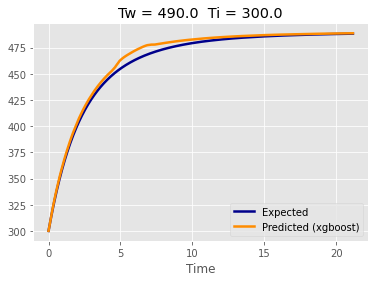

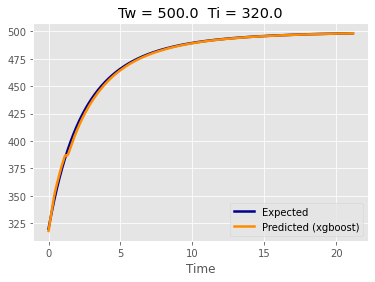

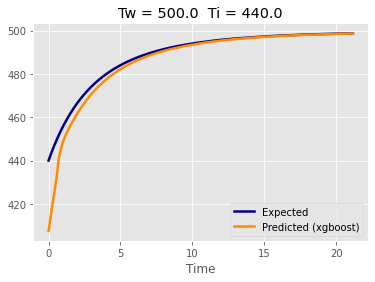

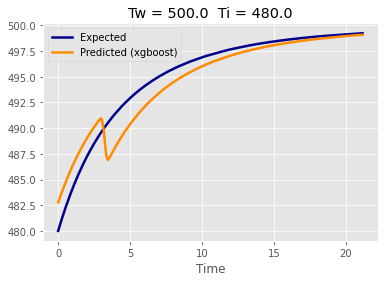

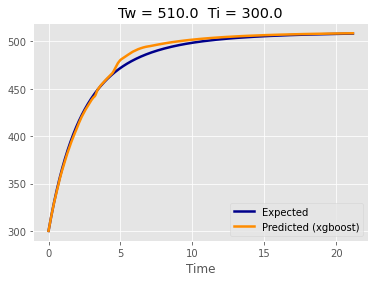

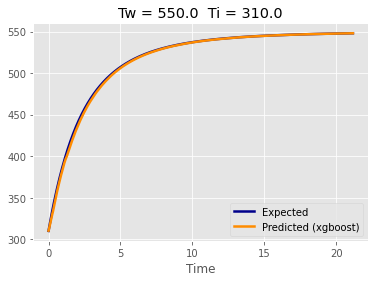

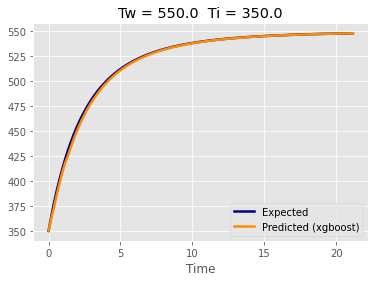

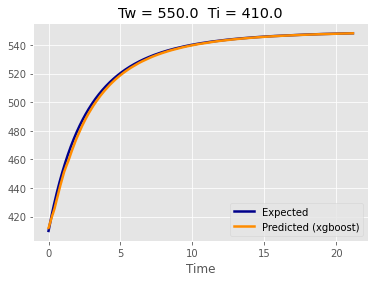

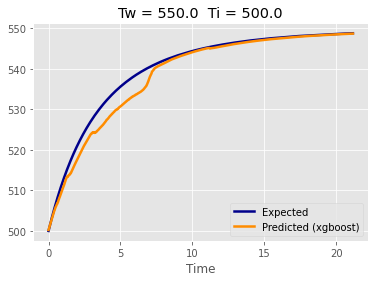

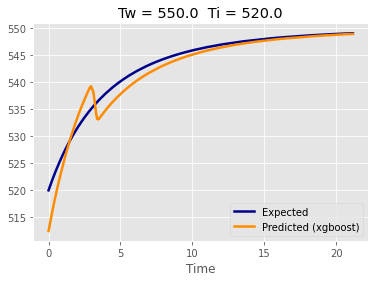

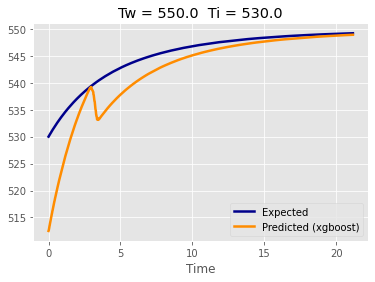

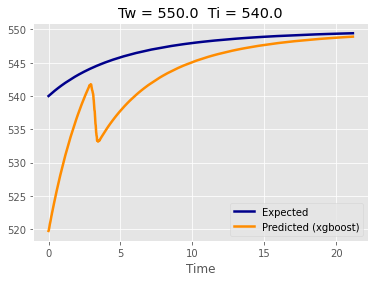

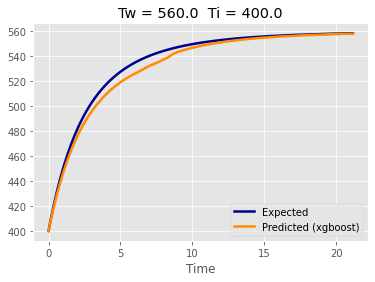

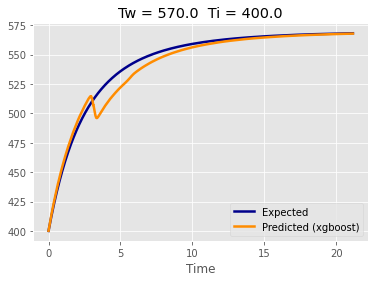

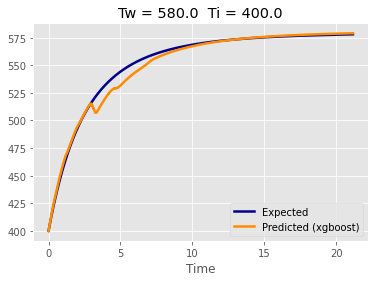

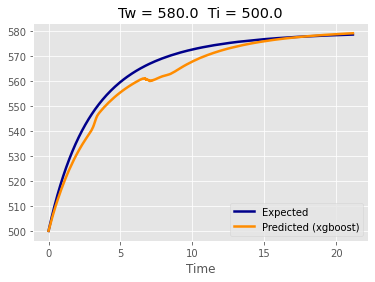

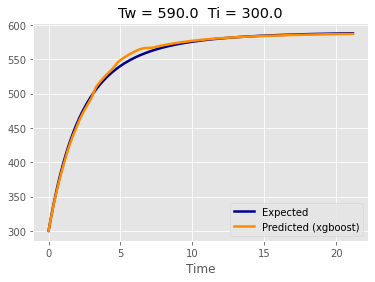

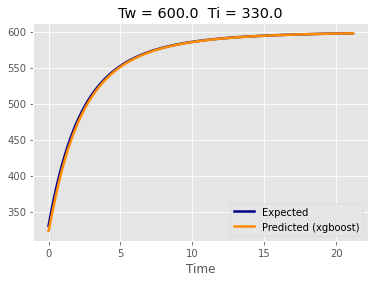

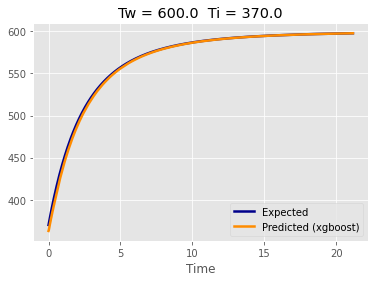

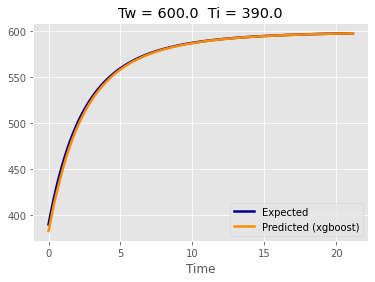

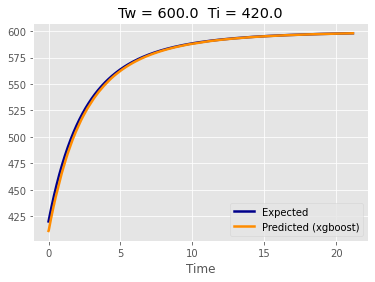

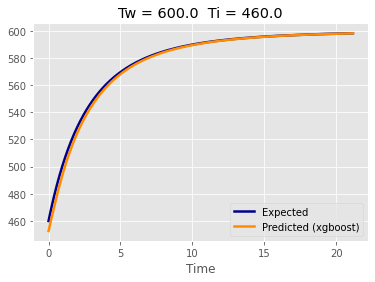

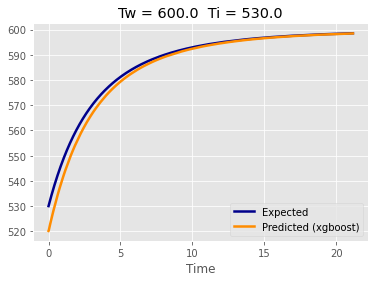

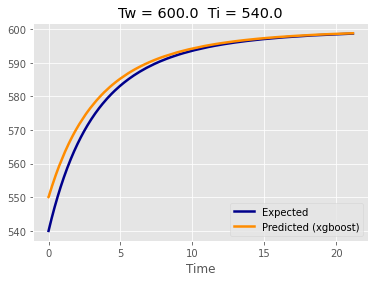

In [11]:
import matplotlib
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    ax = grp.plot(x="Time", y='Tc', c='DarkBlue', linewidth=2.5, label="Expected")
    plot = grp.plot(x="Time", y='Tc_hat', c='DarkOrange', linewidth=2.5, label="Predicted (xgboost)", ax=ax)
    plt.title('Tw = {Tw}  Ti = {Ti}'.format(Tw=idx[0], Ti=idx[1]))
    #plot.set_ylim(bottom=300.0,top=600.0)
    plt.show()

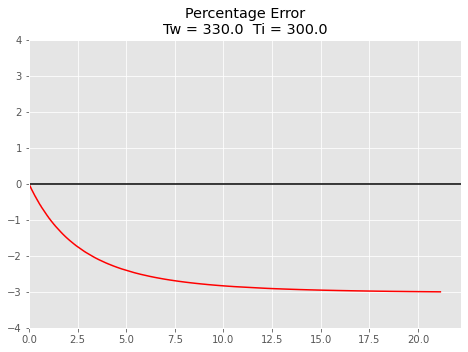

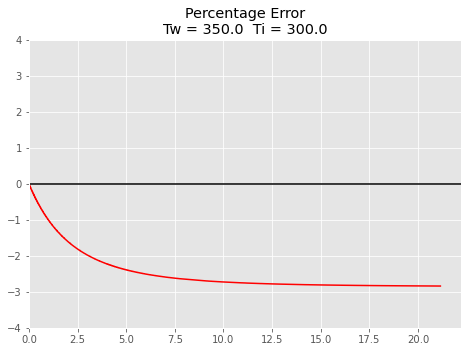

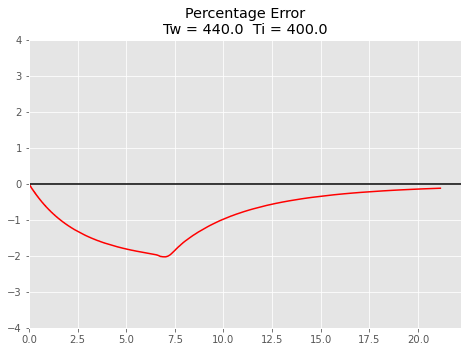

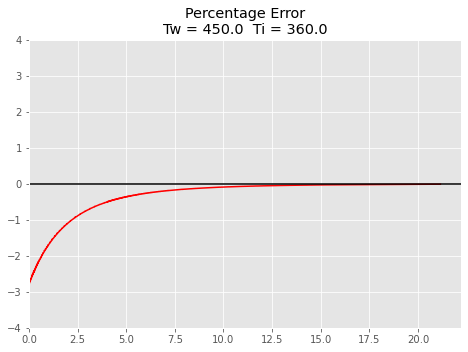

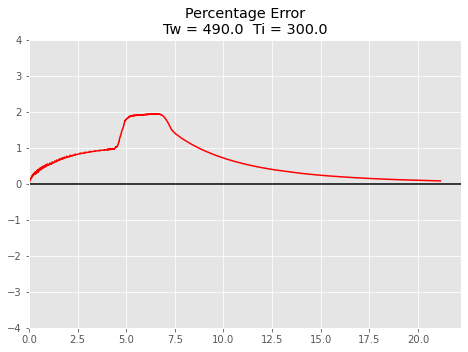

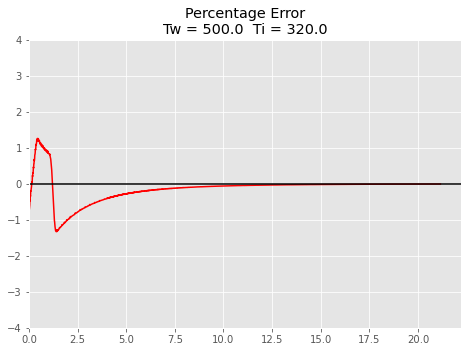

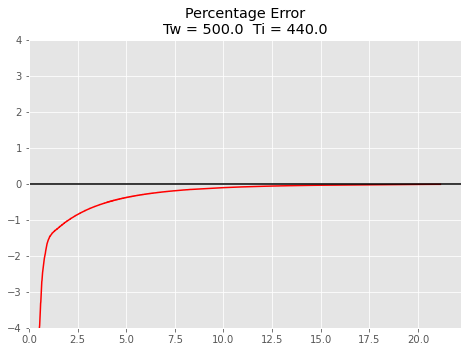

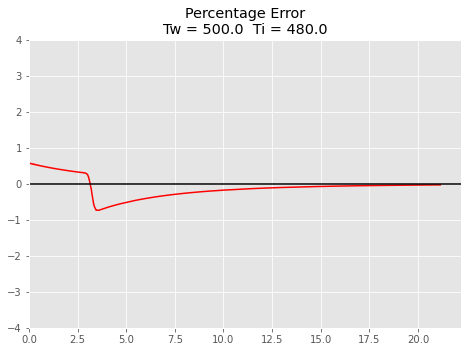

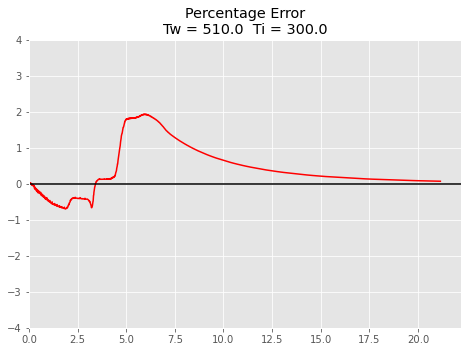

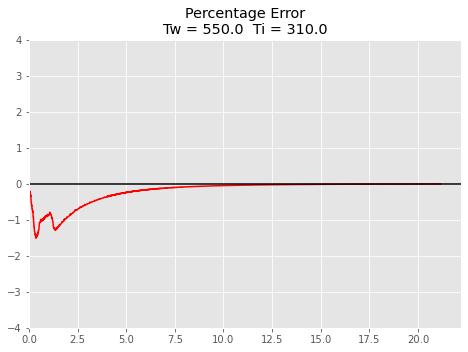

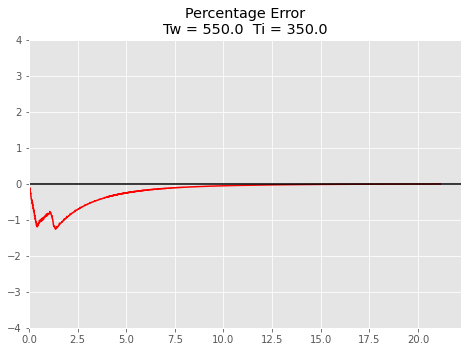

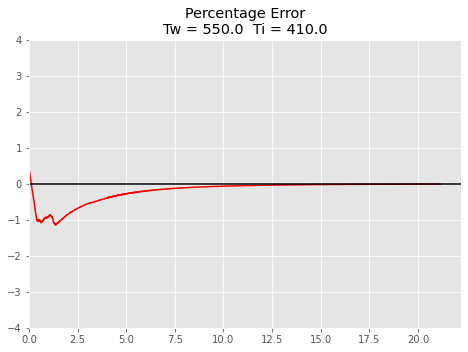

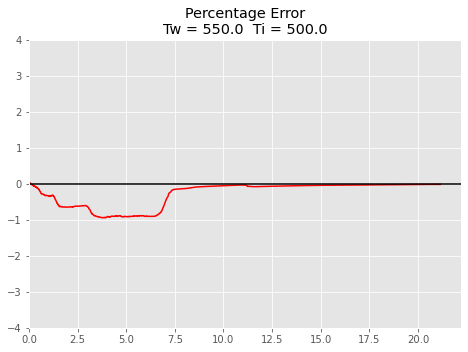

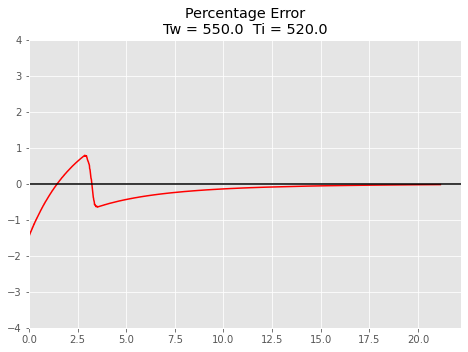

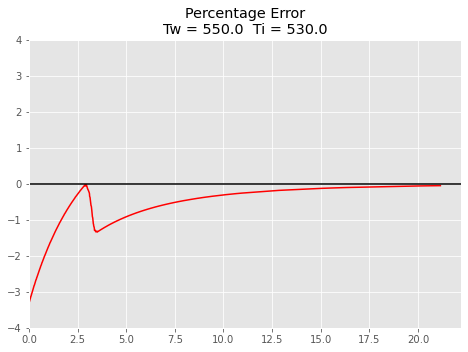

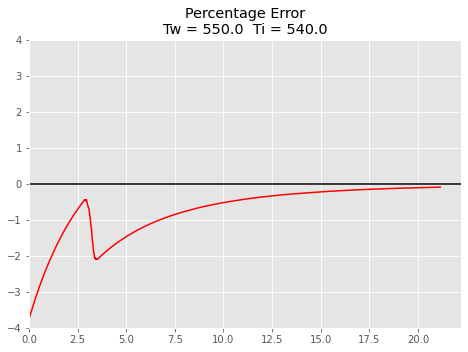

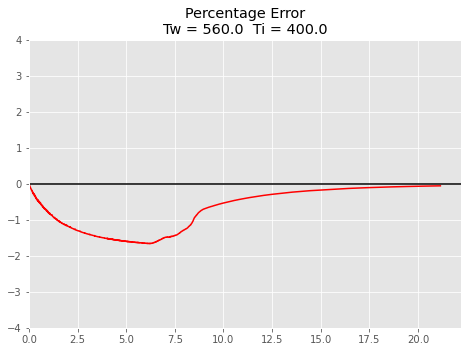

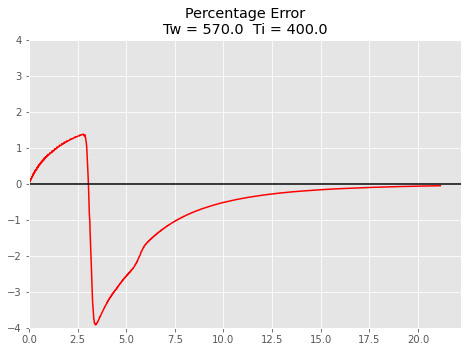

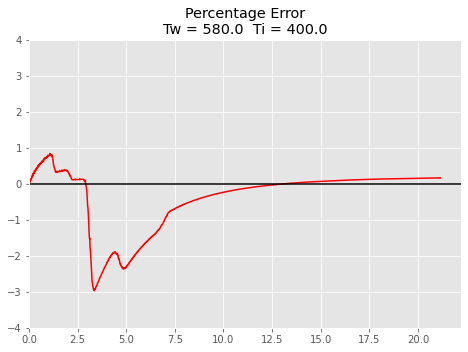

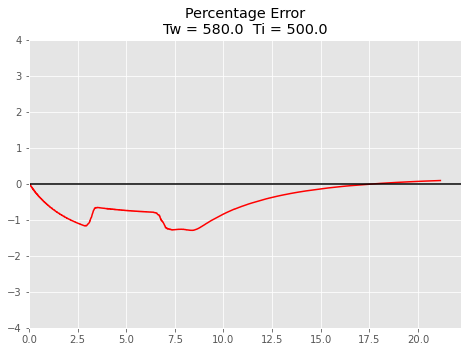

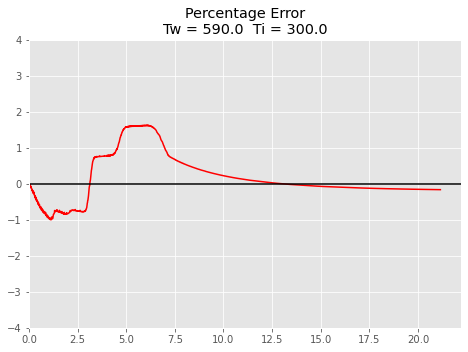

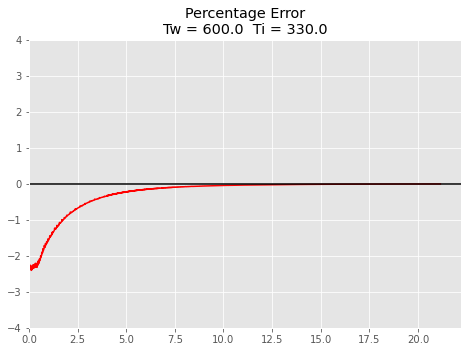

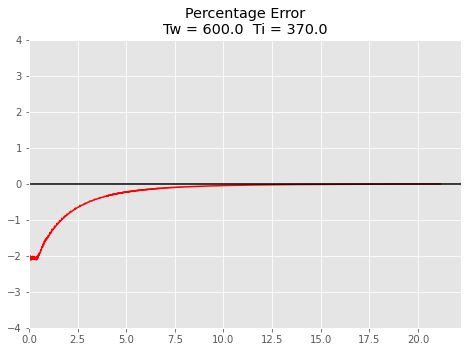

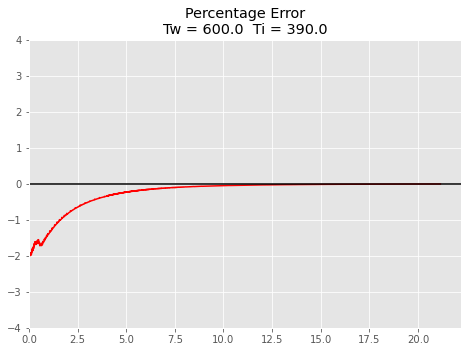

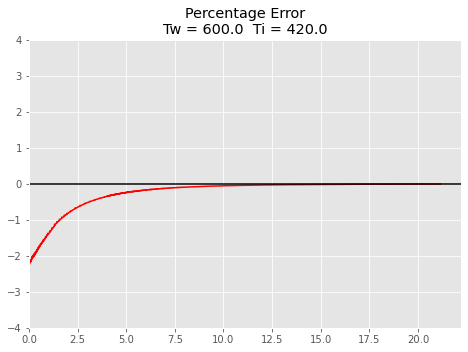

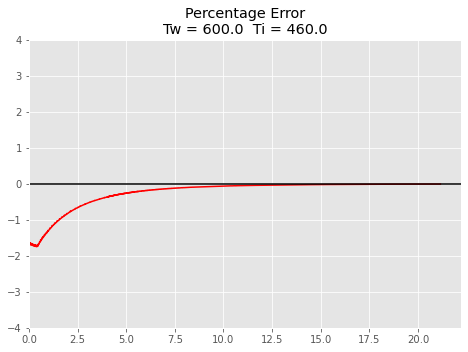

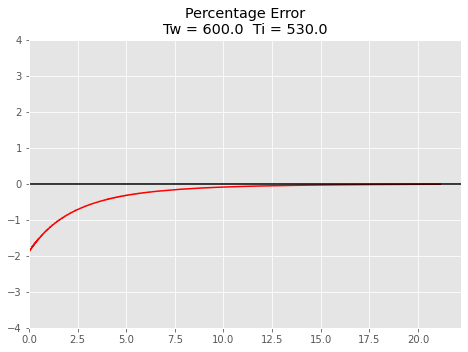

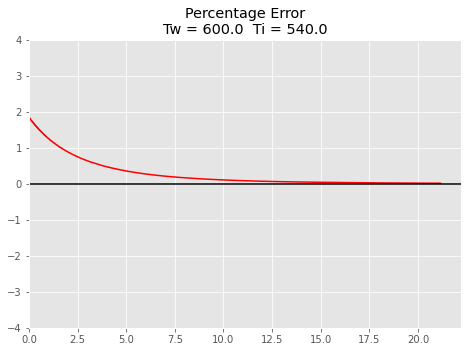

In [12]:
import matplotlib
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    err = 100*(grp['Tc_hat'] - grp['Tc'])/grp['Tc']
    ax = plt.figure().add_axes([0,0,1,1])
    ax.plot(grp['Time'], err, color='r')
    ax.set_ylim(bottom=-4,top=4)
    ax.set_xlim(left=0)
    plt.title('Percentage Error\nTw = {Tw}  Ti = {Ti}'.format(Tw=idx[0], Ti=idx[1]))
    plt.axhline(0, color='black')
    plt.show()

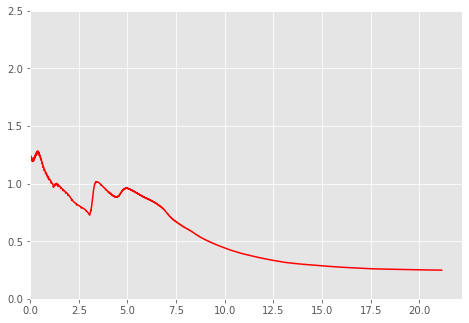

In [24]:
count = 0
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    if count == 0:
        avg_err = abs(100*(grp['Tc_hat'] - grp['Tc'])/grp['Tc'])
    else:
        avg_err += abs(100*(grp['Tc_hat'] - grp['Tc'])/grp['Tc'])
    count += 1

avg_err /= count
ax = plt.figure().add_axes([0,0,1,1])
ax.plot(grp['Time'], avg_err, color='r')
ax.set_ylim(bottom=0,top=2.5)
ax.set_xlim(left=0)
#plt.title('Average Percentage Error at Time Step t')
#plt.axhline(0, color='black')
plt.show()

<AxesSubplot:>

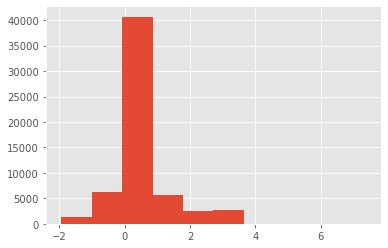

In [13]:
(100*(test_df["Tc"] - test_df["Tc_hat"])/test_df["Tc"]).hist()

<AxesSubplot:>

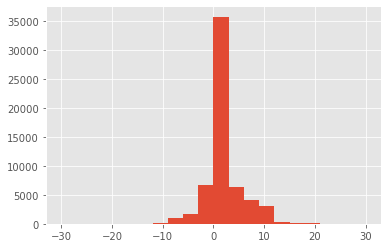

In [14]:
(test_df["Tc"] - test_df["Tc_hat"]).hist(bins=20, range=(-30, 30))

In [15]:
Tdiff_err = [[],[]]
for idx, grp in test_df.groupby(["Tw", "Ti"]):
    grp_diff = abs(grp["Tc"] - grp["Tc_hat"])
    avg_err = grp_diff.sum()
    T_diff = idx[0] - idx[1]
    print(idx, T_diff, avg_err)
    Tdiff_err[0].append(T_diff)
    Tdiff_err[1].append(avg_err)

(330.0, 300.0) 30.0 17618.15468999998
(350.0, 300.0) 50.0 17993.29415799997
(440.0, 400.0) 40.0 7932.767184000135
(450.0, 360.0) 90.0 2750.068197999941
(490.0, 300.0) 190.0 6429.263145999841
(500.0, 320.0) 180.0 1863.3941059997214
(500.0, 440.0) 60.0 4104.714673999621
(500.0, 480.0) 20.0 2361.419792000123
(510.0, 300.0) 210.0 5515.835323999778
(550.0, 310.0) 240.0 1890.8249680000579
(550.0, 350.0) 200.0 1945.4764139998292
(550.0, 410.0) 140.0 2067.7617779999296
(550.0, 500.0) 50.0 3000.64567200003
(550.0, 520.0) 30.0 2498.5410699997756
(550.0, 530.0) 20.0 5568.897093999844
(550.0, 540.0) 10.0 8627.509721999857
(560.0, 400.0) 160.0 7439.214588000053
(570.0, 400.0) 170.0 8918.089471999952
(580.0, 400.0) 180.0 6194.111867999878
(580.0, 500.0) 80.0 6309.296363999834
(590.0, 300.0) 290.0 4959.112550000167
(600.0, 330.0) 270.0 2429.519870000091
(600.0, 370.0) 230.0 2445.810296000116
(600.0, 390.0) 210.0 2402.2713339997604
(600.0, 420.0) 180.0 2560.926593999905
(600.0, 460.0) 140.0 2631.68937

In [16]:
perc_err = (test_df["Tc_hat"] - test_df["Tc"])/test_df["Tc"]
avg_err = 0
cnt = 0
for item in perc_err:
    avg_err += abs(item)
    cnt += 1

avg_err /= cnt
acc = 1 - avg_err
print('Accuracy:',acc)

Accuracy: 0.9945219339648109


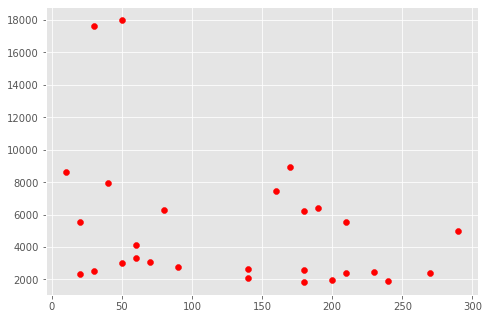

In [17]:
ax = plt.figure().add_axes([0,0,1,1])
ax.scatter(Tdiff_err[0], Tdiff_err[1], color='r')
plt.show()

In [18]:
features_importance = model.feature_importances_

features = ["Time", "Tw", "Ti"]
print("Feature ranking:")
for i, feature in enumerate(features):
    print("{}. {} ({})".format(i + 1, feature, features_importance[i]))

Feature ranking:
1. Time (0.13509146405744857)
2. Tw (0.8164274475972406)
3. Ti (0.048481088345310744)


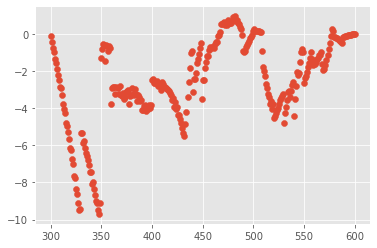

In [19]:
import math

avg_tc_diff = {}

for i in range(300, 601):
    avg_tc_diff[i] = [0,0]

tc_hat_list = test_df['Tc_hat'].tolist()
for i, temp in enumerate(test_df["Tc"]):
    avg_tc_diff[math.floor(temp)][0] += tc_hat_list[i] - temp
    avg_tc_diff[math.floor(temp)][1] += 1

temp = []
diff = []
for key, value in avg_tc_diff.items():
    if avg_tc_diff[key][1] > 0:
        avg_tc_diff[key][0] /= avg_tc_diff[key][1]
    temp.append(key)
    diff.append(avg_tc_diff[key][0])
    
plt.scatter(temp, diff)
plt.show()

In [20]:
print(r2_score(test_df["Tc"],test_df["Tc_hat"]))

0.9970031532600112
